In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C5_health care diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
df1=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [12]:
x=df1.drop('Outcome',axis=1)
y=df1['Outcome']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [22]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [17]:
grid_search.best_score_

0.774711479775842

In [19]:
rfc_best=grid_search.best_estimator_

[Text(2039.5862068965519, 1956.96, 'BMI <= 29.95\ngini = 0.474\nsamples = 336\nvalue = [330, 207]\nclass = Yes'),
 Text(846.6206896551724, 1522.0800000000002, 'Glucose <= 123.0\ngini = 0.313\nsamples = 134\nvalue = [162, 39]\nclass = Yes'),
 Text(307.86206896551727, 1087.2, 'Glucose <= 103.5\ngini = 0.134\nsamples = 94\nvalue = [129, 10]\nclass = Yes'),
 Text(153.93103448275863, 652.3200000000002, 'gini = 0.0\nsamples = 61\nvalue = [92, 0]\nclass = Yes'),
 Text(461.79310344827593, 652.3200000000002, 'DiabetesPedigreeFunction <= 0.6\ngini = 0.335\nsamples = 33\nvalue = [37, 10]\nclass = Yes'),
 Text(307.86206896551727, 217.44000000000005, 'gini = 0.165\nsamples = 22\nvalue = [30, 3]\nclass = Yes'),
 Text(615.7241379310345, 217.44000000000005, 'gini = 0.5\nsamples = 11\nvalue = [7, 7]\nclass = Yes'),
 Text(1385.3793103448277, 1087.2, 'SkinThickness <= 6.0\ngini = 0.498\nsamples = 40\nvalue = [33, 29]\nclass = Yes'),
 Text(1077.5172413793105, 652.3200000000002, 'Age <= 44.5\ngini = 0.491\

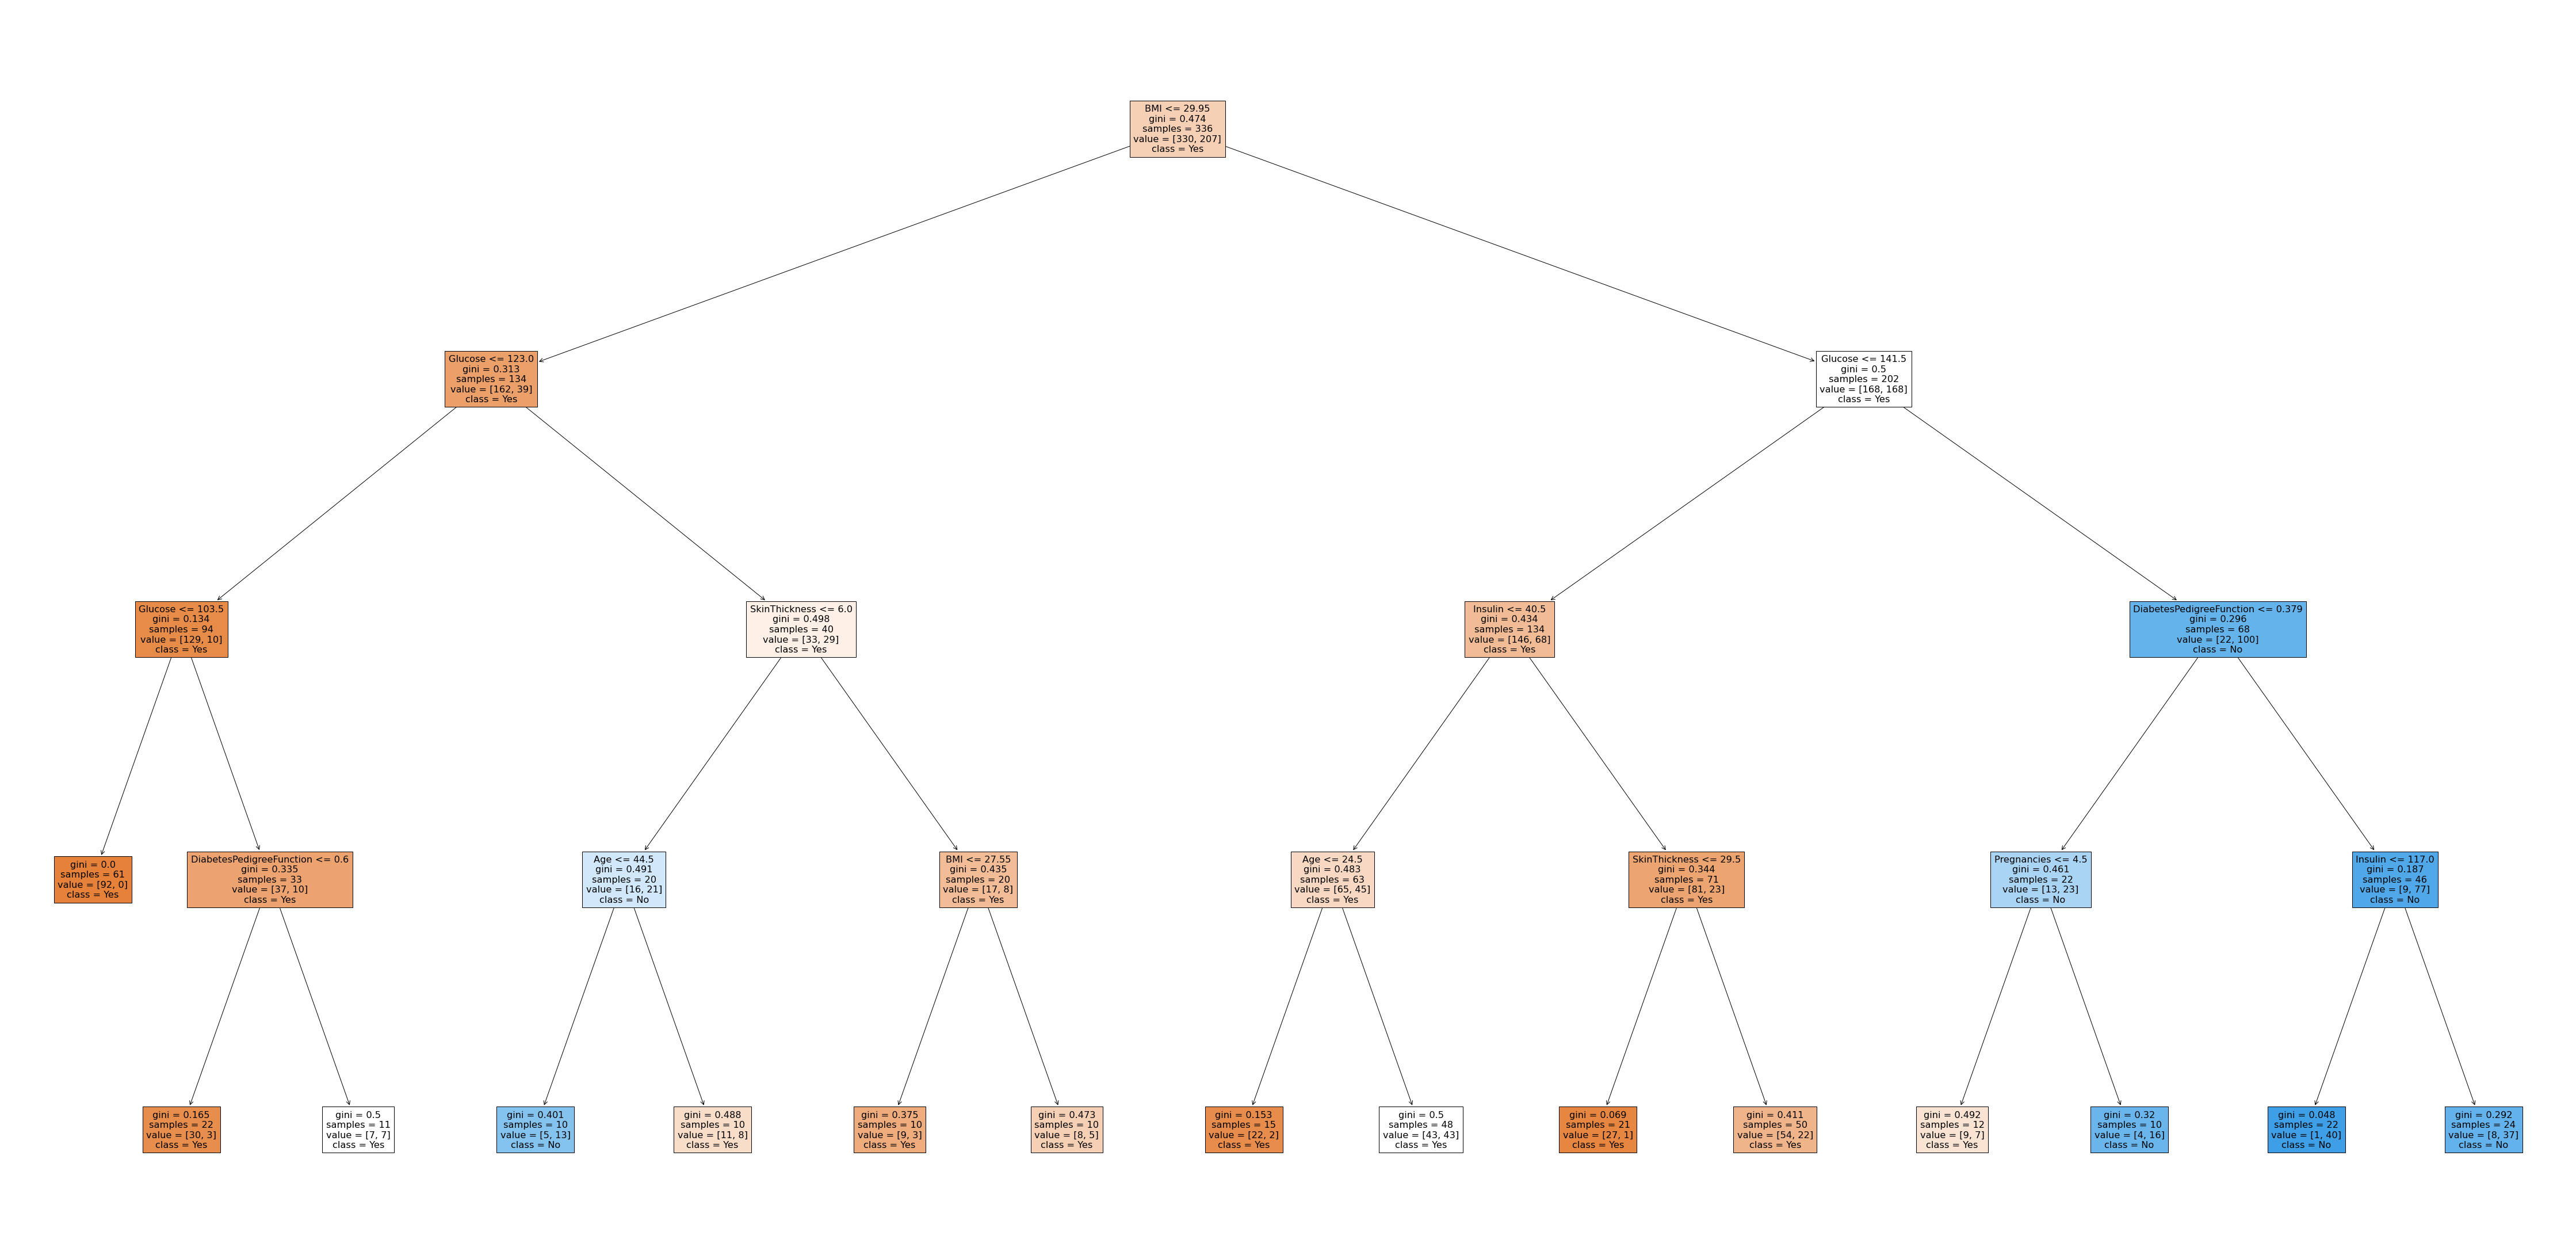

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)